In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, roc_auc_score

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560655 entries, 0 to 560654
Data columns (total 13 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   0                                           560655 non-null  int64  
 1   Electricity:Facility [kW](Hourly)           560655 non-null  float64
 2   Fans:Electricity [kW](Hourly)               560655 non-null  float64
 3   Cooling:Electricity [kW](Hourly)            560655 non-null  float64
 4   Heating:Electricity [kW](Hourly)            560655 non-null  float64
 5   InteriorLights:Electricity [kW](Hourly)     560655 non-null  float64
 6   InteriorEquipment:Electricity [kW](Hourly)  560655 non-null  float64
 7   Gas:Facility [kW](Hourly)                   560655 non-null  float64
 8   Heating:Gas [kW](Hourly)                    560655 non-null  float64
 9   InteriorEquipment:Gas [kW](Hourly)          560655 non-n

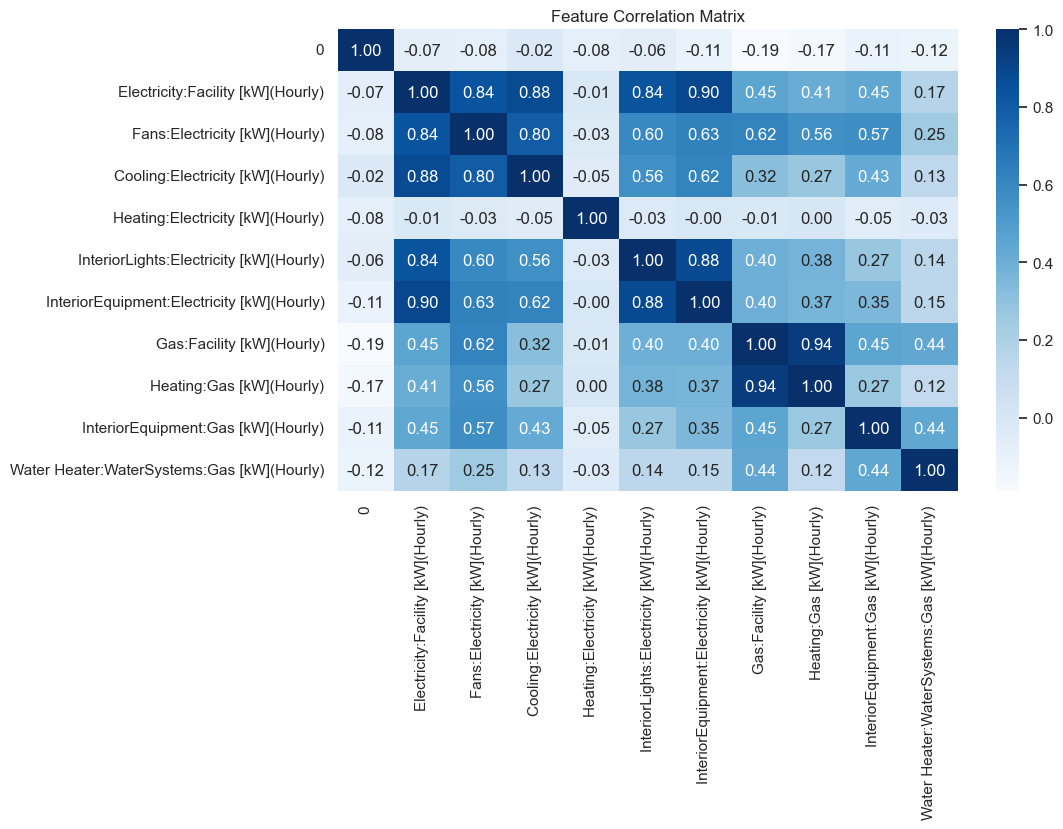

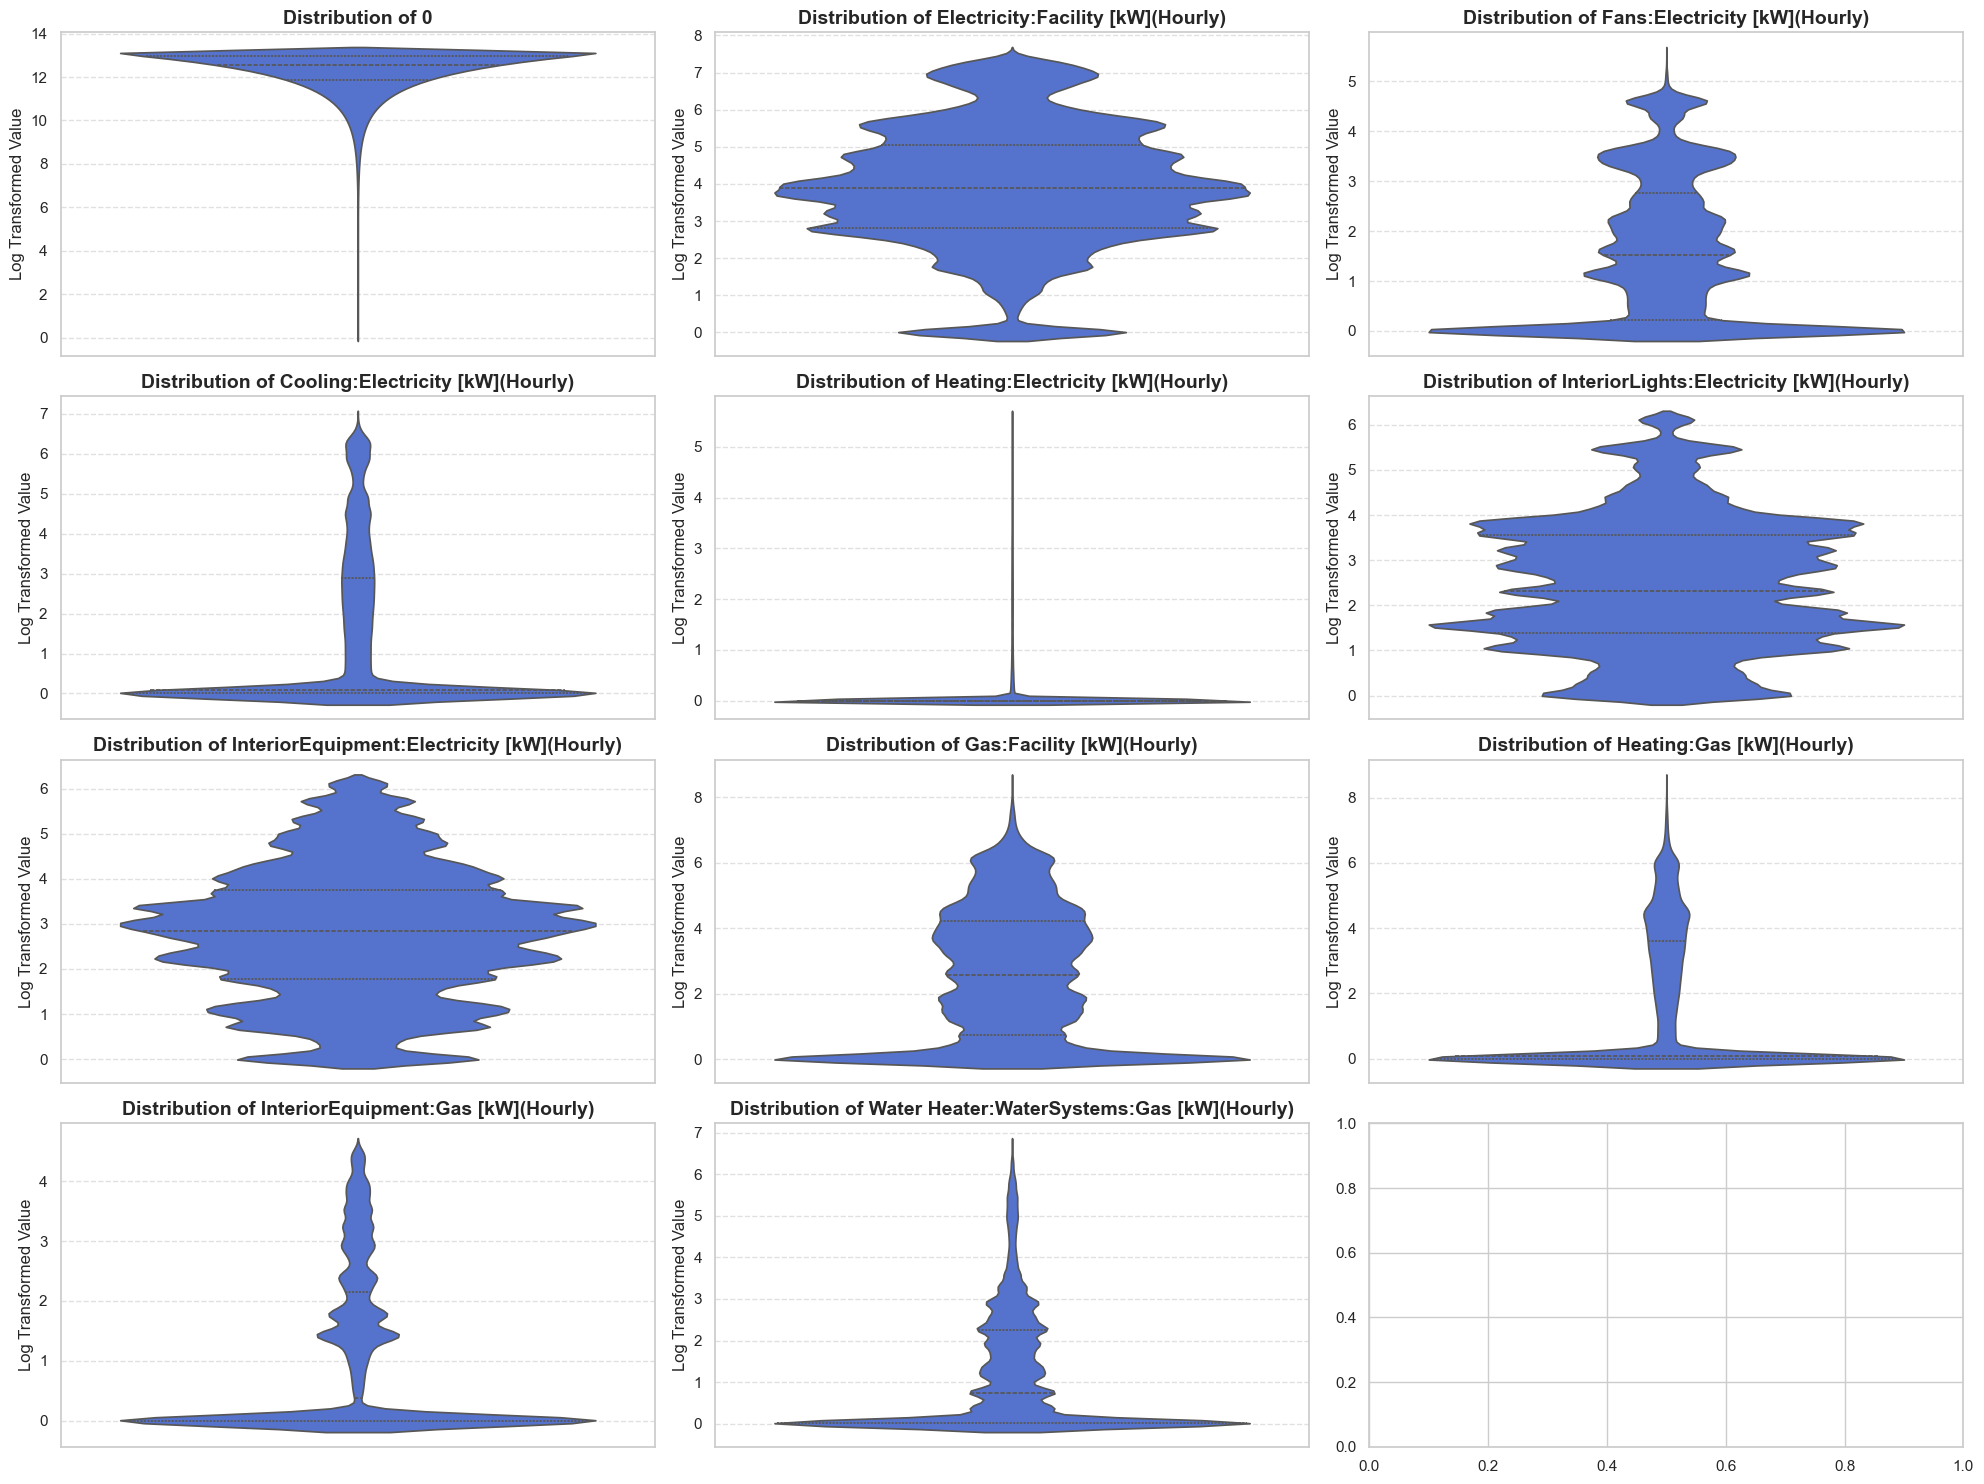

In [5]:



file_path = "df.csv"  
df = pd.read_csv(file_path)


print("Dataset Info:")
print(df.info())


print("\nFirst 5 rows of the dataset:")
print(df.head())


print("\nSummary Statistics:")
print(df.describe())


print("\nMissing Values:")
print(df.isnull().sum())


plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Set theme for aesthetics
sns.set_theme(style="whitegrid")

# Apply log transformation to handle skewness
df_log = np.log1p(df.select_dtypes(include=['number']))

# Define numerical columns
numerical_cols = df_log.columns

# Create subplots with improved spacing
fig, axes = plt.subplots(nrows=len(numerical_cols)//3 + 1, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.violinplot(y=df_log[col], ax=axes[i], color="royalblue", inner="quartile")
    axes[i].set_title(f"Distribution of {col}", fontsize=14, fontweight="bold")
    axes[i].set_ylabel("Log Transformed Value")
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)
    
# Adjust layout for better spacing
plt.tight_layout()
plt.show()



In [6]:
# I did not do anyththing hehehe

In [10]:
df = pd.read_csv("df.csv")  # Replace with actual file path

# Encoding labels
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Class"])
df["theft"] = label_encoder.fit_transform(df["theft"])


In [13]:

# Splitting data
feature_cols = [
    "Electricity:Facility [kW](Hourly)", "Fans:Electricity [kW](Hourly)", "Cooling:Electricity [kW](Hourly)",
    "Heating:Electricity [kW](Hourly)", "InteriorLights:Electricity [kW](Hourly)", "InteriorEquipment:Electricity [kW](Hourly)",
    "Gas:Facility [kW](Hourly)", "Heating:Gas [kW](Hourly)", "InteriorEquipment:Gas [kW](Hourly)",
    "Water Heater:WaterSystems:Gas [kW](Hourly)"
]
X = df[feature_cols]
y = df["theft"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
models = {
    "KNN": KNeighborsClassifier(n_neighbors=10),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=100),
    "Bagging": BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=10), n_estimators=10),
    # "ANN": MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=300)
}



In [ ]:
# Train & Evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred, average='weighted'),
        "Kappa": cohen_kappa_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr') if hasattr(model, "predict_proba") else None
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)



Binary Confusion Matrix for Class 0:
[[41176  4590]
 [ 3811 62554]]


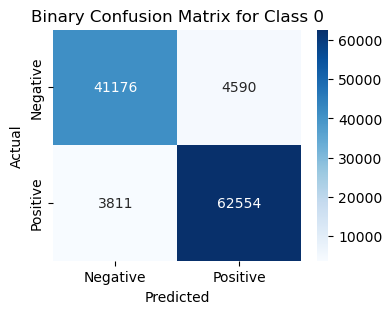


Binary Confusion Matrix for Class 1:
[[98430  3485]
 [ 2487  7729]]


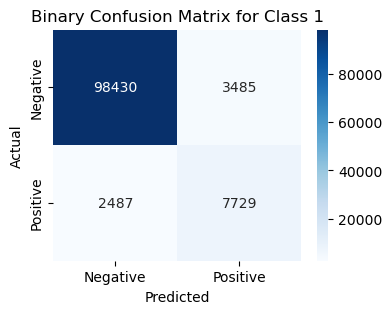


Binary Confusion Matrix for Class 2:
[[107536      0]
 [     0   4595]]


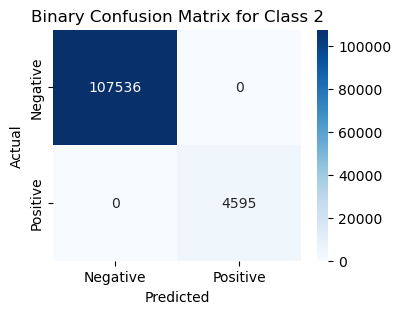


Binary Confusion Matrix for Class 3:
[[101174   2087]
 [  3827   5043]]


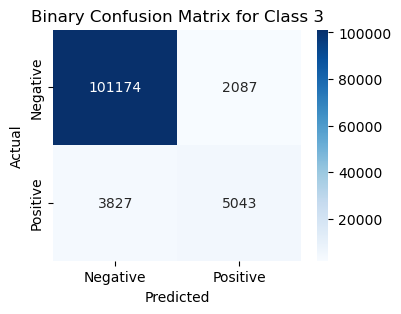


Binary Confusion Matrix for Class 4:
[[102539   1300]
 [   552   7740]]


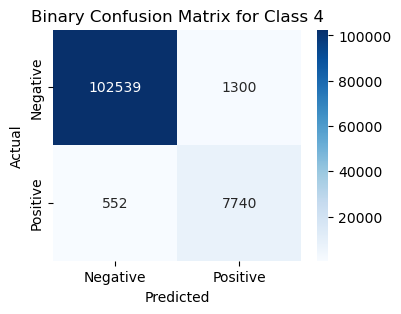


Binary Confusion Matrix for Class 5:
[[104892    529]
 [   378   6332]]


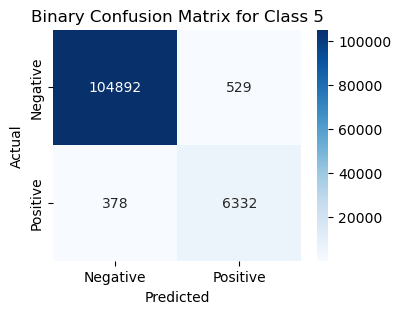


Binary Confusion Matrix for Class 6:
[[99303  5745]
 [ 6681   402]]


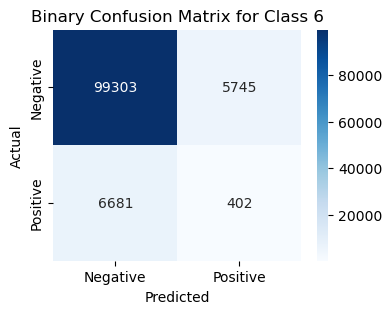